In [137]:
import pandas as pd 
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt

In [126]:
df_priceav = pd.read_csv('../data/desafio_priceav.csv')

In [3]:
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


removendo as linhas que não contem a data em que foi reservado

In [127]:
df_priceav = df_priceav[df_priceav['booked_on'] != 'blank']
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1


calculando a antecedencia média das reservas

In [128]:
df_priceav['antecedencia_reserva'] = 0
for i in range(len(df_priceav)):
    d1 = datetime.strptime(df_priceav['booked_on'].iloc[i][0:10], '%Y-%m-%d').date()
    d2 = datetime.strptime(df_priceav['date'].iloc[i], '%Y-%m-%d').date()
    df_priceav['antecedencia_reserva'].iloc[i] = abs((d2 - d1).days)


In [129]:
media = df_priceav['antecedencia_reserva'].mean()
print(f'a antecedência média das reservas são de {round(media)} Dias')


a antecedência média das reservas são de 32 Dias


Calculando antecedencia por dia da semana

In [130]:

DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]

In [131]:
def get_dia_da_semana(str_date):
    data = datetime.strptime(str_date, '%Y-%m-%d').date()
    return DIAS[data.weekday()]


In [132]:
df_priceav['dia_da_semana'] = df_priceav['date'].map(get_dia_da_semana)
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia_reserva,dia_da_semana
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1,0,Sexta-feira
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1,1,Sábado
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1,0,Quarta-feira
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1,1,Quinta-Feira
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1,2,Sexta-feira


In [185]:
df = pd.DataFrame(df_priceav.groupby(by='dia_da_semana')['antecedencia_reserva'].mean().reset_index())
df

,dia_da_semana,antecedencia_reserva
0,Domingo,32.432216
1,Quarta-feira,32.808432
2,Quinta-Feira,32.869940
3,Segunda-feira,31.893598
4,Sexta-feira,33.004906
5,Sábado,32.312532
6,Terça-feira,31.178388


Visualizando em formato de Gráfico

In [ ]:
x=[1,2]
plt.title('Antecedência média das reservas por dias da semana')
plt.bar(x, height=[df_priceav])

<AxesSubplot:>

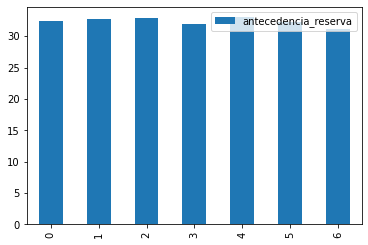

In [187]:
df.plot.bar()